## Electiva: Fundamentos de Inteligencia Artificial 🤖
---
### Práctica 1: Clustering y Clasificación Lineal
Francis Bompart

In [32]:
%pip install pandas
%pip install sklearn
%pip install scipy
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


## 📍 Parte 1. Clustering _k-Means_ 

In [33]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carga y graficación del wine dataset 🍷

In [10]:
wine = load_wine()
wine_dataset = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_dataset['target'] = wine.target
wine_dataset.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


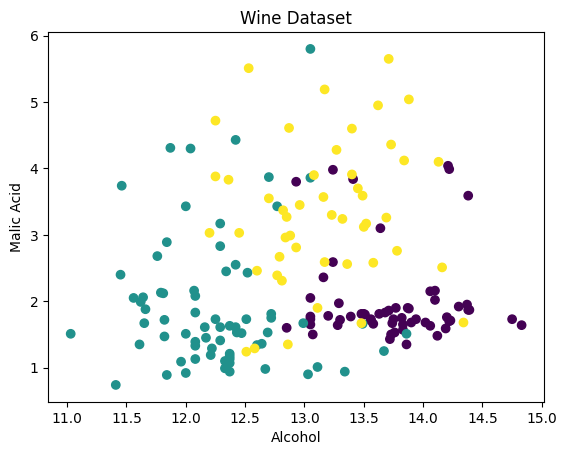

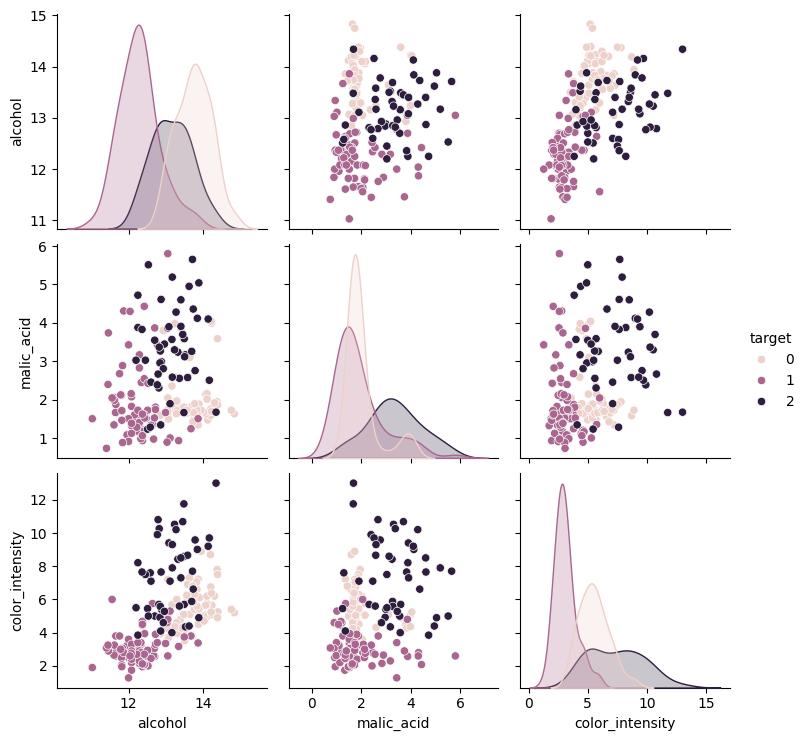

In [29]:
plt.scatter(wine_dataset['alcohol'], wine_dataset['malic_acid'], c=wine_dataset['target'])
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('Wine Dataset')
plt.show()

# Data correlacionada
partial_wine_dataset=wine_dataset[['alcohol','malic_acid','color_intensity','target']]
sns.pairplot(partial_wine_dataset,hue='target')

### Implementacion del algoritmo _k-Means_

In [12]:
def clustering_k_means(data, k, max_iter=100):
    # Inicializar centroides aleatoriamente
    np.random.seed(42)  
    index = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[index]

    for _ in range(max_iter):
        # Matriz de distancias euclidianas entre cada punto y los centroides
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        # Vector con los indices de los centroides mas cercanos a cada punto
        clusters = np.argmin(distances, axis=0)

        # Calcular nuevos centroides como la media de los puntos en cada cluster
        for i in range(k):
            centroids[i] = np.mean(data[clusters == i], axis=0)

    return centroids, clusters

### Optimizacion de _k_ mediante el metodo del codo 💪

In [13]:
def elbow_method(data, max_clusters=10):
    # Suma de las distancias al cuadrado por cada iteracion
    wcss = []
    for i in range(1, max_clusters+1):
        centroids, _ = clustering_k_means(data, i)
        # Matriz de distancias euclidianas entre cada punto y los centroides
        euclidian_distances = cdist(data, centroids, 'euclidean')
        # Distancia minima entre cada punto y su centroide mas cercano
        min_distances = np.min(euclidian_distances, axis=1)
        # Suma de las distancias al cuadrado
        wcss.append(np.sum(min_distances)**2)

    plt.plot(range(1, max_clusters+1), wcss)
    plt.title('Método del codo')
    plt.xlabel('Número de clusters')
    plt.ylabel('WCSS')
    plt.show()

    return wcss

### Clustering del wine dataset 🏷️🍷

In [22]:
optimize = False

if optimize:
    wcss = elbow_method(wine.data, 10)
    print(wcss)
else:
    k = 3
    centroids, clusters = clustering_k_means(wine.data, k)
    wine_dataset['estimate_target'] = clusters
    matching_values_count = (wine_dataset['target'] == wine_dataset['estimate_target']).sum()
    print(f"Number of matching values: {matching_values_count} of {len(wine_dataset)}")

Number of matching values: 33 of 178


### Conclusiones 🧠💭📝

Al visualizar el target inicial del wine dataset, se observa que el numero optimo de clusters es igual a 3. Dicho numero se obtuvo de igual forma al aplicar el algoritmo de clusterizacion y optimizacion implementado en esta practica, sin embargo, el numero de aciertos corresponde a solo un 18.5% en relacion a la data real 

## 📍 Parte 2. Busqueda _knn_ 🔎🏘


In [107]:
from sklearn.datasets import load_iris
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

### Carga y graficación del iris dataset 👁️

In [35]:
iris = load_iris()

iris_dataset = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_dataset['target'] = iris.target

# Seleccionar solo las especies Setosa y Versicolor
species = iris_dataset[iris_dataset['target'].isin([0, 1])]

species.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


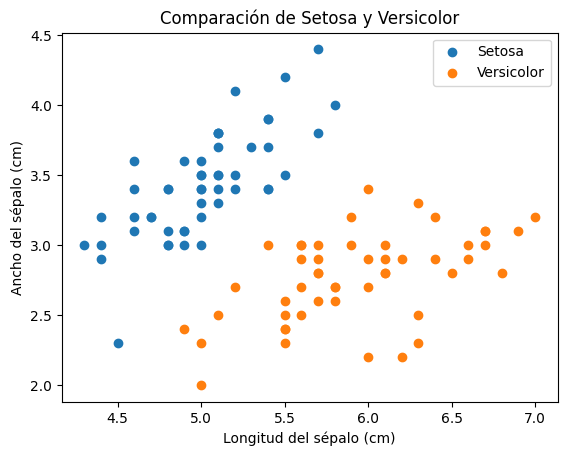

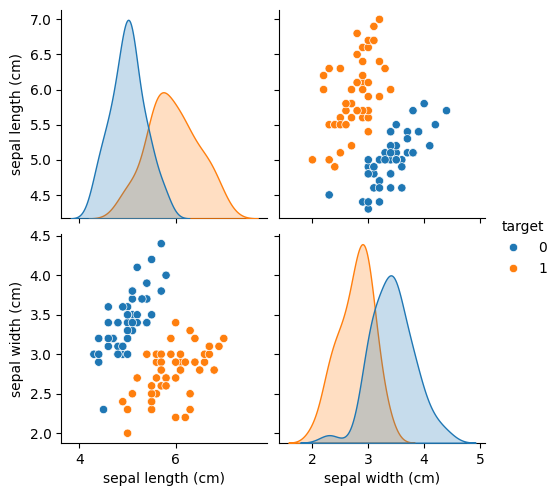

In [36]:
X = species[['sepal length (cm)', 'sepal width (cm)']]
y = species['target']
y_labels = ['Setosa', 'Versicolor']

for i in y.unique():
  plt.scatter(X['sepal length (cm)'][y==i], X['sepal width (cm)'][y==i], label=y_labels[i])

plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Ancho del sépalo (cm)')
plt.title('Comparación de Setosa y Versicolor')
plt.legend()
plt.show()

# Data correlacionada
sns.pairplot(pd.concat([X,y], axis=1),hue='target')

### Preparación de la data 🐛➡🦋 

In [60]:
# Dividir los datos en entrenamiento, validación y prueba (50% - 30% - 25%)
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.6, random_state=42)

X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_val_np = X_val.to_numpy()
y_val_np = y_val.to_numpy()
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

### Implementacion del algoritmo _knn_ 🔎🏘 

In [92]:
def knn_binary_classifier(X_train, y_train, X, k):
  y_pred = []

  for x in X:
    # Matrix de distancias euclidianas entre los puntos ya clasificados y los puntos a predecir
    distances = np.sqrt(np.sum((X_train - x)**2, axis=1))

    # Se ordenan las distancias y se obtienen los índices de los k vecinos más cercanos
    k_indices = np.argsort(distances)[:k]

    # Etiquetas de los k vecinos más cercanos
    k_nearest_labels = y_train[k_indices]

    # Contar las etiquetas más comunes
    label_counts = Counter(k_nearest_labels)
    most_common = label_counts.most_common()

    # Verificar si hay empate y reducir k si es necesario
    while len(most_common) > 1 and most_common[0][1] == most_common[1][1] and k > 1:
      print(f"Empate entre {most_common[0][0]} y {most_common[1][0]}. Reduciendo k a {k-1}")
      input()
      k -= 1
      k_indices = np.argsort(distances)[:k]
      k_nearest_labels = y_train[k_indices]
      label_counts = Counter(k_nearest_labels)
      most_common = label_counts.most_common() 

    if len(most_common) == 0:
      print(f"No se encontraron vecinos cercanos para {x}")
      most_common_label = -1
    else:  
      most_common_label = most_common[0][0]
    y_pred.append(most_common_label)

  return np.array(y_pred)


### Grid search para búsqueda del _k_ óptimo 🎯🧐

In [96]:
def grid_method_for_optimal_k(X_train, y_train, X_val, y_val):
  knn_accuracies = []
  for k in range(1, 10):
    y_pred = knn_binary_classifier(X_train, y_train, X_val, k)
    knn_accuracies.append(accuracy_score(y_val, y_pred))

  # Seleccion del k
  optimal_k = np.argmax(knn_accuracies) + 1
  return optimal_k, knn_accuracies

### Clasificación del iris dataset 👁️📈

In [105]:
mine_optimal_k, knn_accuracies = grid_method_for_optimal_k(X_train_np, y_train_np, X_val_np, y_val_np)

print(f"Optimal k: {mine_optimal_k}")

mine_predictions = knn_binary_classifier(X_train_np, y_train_np, X_test_np, mine_optimal_k)
mine_accuracy = accuracy_score(y_test_np, mine_predictions)

print(f"Accuracy: {mine_accuracy}")

Optimal k: 1
Accuracy: 1.0


### Implementacion de scikit-learn del algoritmo _knn_ 🔎🏘 

In [100]:
def knn_classifier(X_train, y_train, X_test, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predecir las etiquetas para el conjunto de prueba
    y_pred = knn.predict(X_test)
    return y_pred

In [102]:
def cv_grid_search(X_train, y_train):
    parameters = {'n_neighbors': range(1, 10)}

    grid_search = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)
    grid_search.fit(X_train, y_train)

    # Mejor modelo
    best_k = grid_search.best_params_['n_neighbors']

    return best_k

In [106]:
optimal_k = cv_grid_search(X_train_np, y_train_np)
print(f"Optimal k: {optimal_k}")

predictions = knn_classifier(X_train_np, y_train_np, X_test_np, optimal_k)
accuracy = accuracy_score(y_test_np, predictions)
print(f"Accuracy: {accuracy}")

Optimal k: 3
Accuracy: 1.0


### Evaluación mediante matriz de confusión

Mine Confusion matrix:


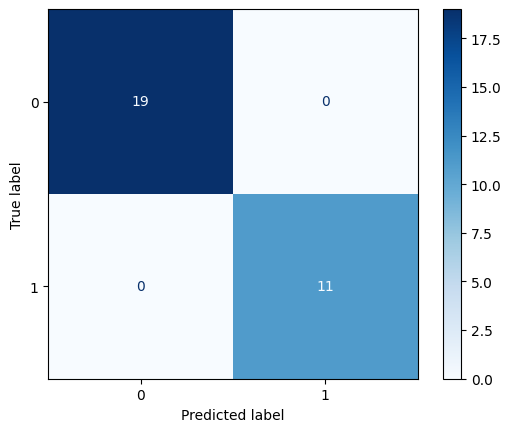

In [111]:
mine_cm = confusion_matrix(y_test_np, mine_predictions)
print("Mine Confusion matrix:")

disp = ConfusionMatrixDisplay(confusion_matrix=mine_cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Scikit-Learn Confusion matrix:


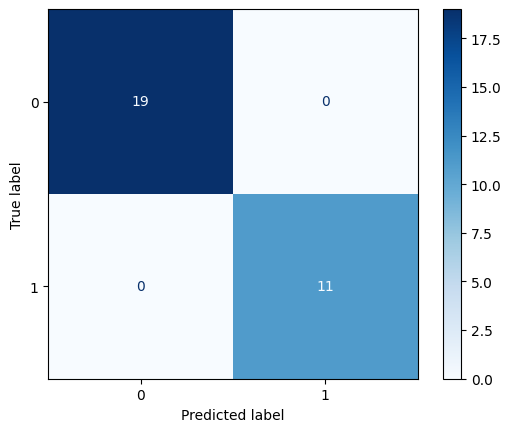

In [112]:
cm = confusion_matrix(y_test_np, predictions)
print("Scikit-Learn Confusion matrix:")

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Conclusiones 🧠💭📝